# Problem 2: Decision Tree
Create a 2-dimensional data set with 30 samples that has the following properties
1. Samples should belong to 2 classes (15 samples per class)
2. All samples can be correctly classified using a decision tree classifier with only 2 levels
3. The data cannot be perfectly classified using a linear classifier.

If it is not possible to generate such data, explain why. Otherwise, generate a scatter plot of your data using a different color/symbol for each class. Indicate the samples that cannot be classified correctly using a linear classifier.

Display your 2-level decision tree indicating the feature/threshold used at each non-leaf node and
the number of samples at each leaf node.

Note: This data should be generated manually and you do not need to run any code on it




In [2]:
import matplotlib.pyplot as plt
import mglearn
import numpy as np
import pandas
import pandas as pd
import sns as sns
from numpy import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

random.seed(42)


def generate_neighborhood_in_rectangle(
        class_name,
        neighbor_count,
        x_min,
        x_max,
        y_min,
        y_max,
):
    items = []
    X_set = []
    y_set = []
    for i in range(0, neighbor_count):
        feature_1 = random.uniform(x_min, x_max)
        feature_2 = random.uniform(y_min, y_max)
        # item = {'class': class_name, 'x': x, 'y': y}
        item = [class_name, feature_1, feature_2]
        X_set.append([feature_1, feature_2])
        y_set.append(class_name)

    neighborhood = pd.DataFrame(items, columns=['Class', 'f1', 'f2'])

    return np.array(X_set), np.array(y_set)


def split_X_y(neighborhood):
    y = pd.DataFrame(neighborhood.Class, columns=['Class'])
    X = pd.DataFrame(
        [
            neighborhood,
            neighborhood.f2
        ], columns=['f1', 'f2']
    )
    return X, y

[[13.74540119 19.50714306]
 [17.31993942 15.98658484]
 [11.5601864  11.5599452 ]
 [10.58083612 18.66176146]
 [16.01115012 17.08072578]
 [10.20584494 19.69909852]
 [18.32442641 12.12339111]
 [11.81824967 11.8340451 ]
 [13.04242243 15.24756432]
 [14.31945019 12.9122914 ]
 [16.11852895 11.39493861]
 [12.92144649 13.66361843]
 [14.56069984 17.85175961]
 [11.99673782 15.14234438]
 [15.92414569 10.46450413]
 [16.07544852  1.70524124]
 [10.65051593  9.48885537]
 [19.65632033  8.08397348]
 [13.04613769  0.97672114]
 [16.84233027  4.40152494]
 [ 1.22038235  4.9517691 ]
 [ 0.34388521  9.09320402]
 [ 2.58779982  6.62522284]
 [ 3.11711076  5.20068021]
 [ 5.46710279  1.84854456]
 [ 9.69584628 17.75132823]
 [ 9.39498942 18.9482735 ]
 [ 5.97899979 19.21874235]
 [ 0.88492502 11.95982862]
 [ 0.45227289 13.25330331]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


Text(0, 0.5, 'Feature 2')

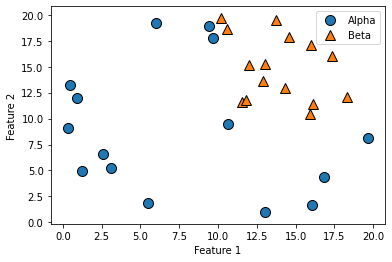

In [8]:
random.seed(42)

quadrant_1_X, quadrant_1_y = generate_neighborhood_in_rectangle(1, 15, 10, 20, 10, 20)
quadrant_2_X, quadrant_2_y = generate_neighborhood_in_rectangle(0, 5, 10, 20, 0, 10)
quadrant_3_X, quadrant_3_y = generate_neighborhood_in_rectangle(0, 5, 0, 10, 0, 10)
quadrant_4_X, quadrant_4_y = generate_neighborhood_in_rectangle(0, 5, 0, 10, 10, 20)
X_train = np.concatenate((quadrant_1_X, quadrant_2_X, quadrant_3_X,quadrant_4_X))
print(X_train)
y_train = np.concatenate((quadrant_1_y, quadrant_2_y, quadrant_3_y,quadrant_4_y))
print(y_train)

mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.legend(['Alpha', 'Beta'])
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

1.0


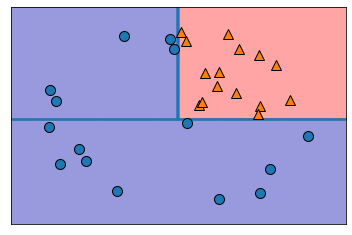

In [10]:
from mlxtend.plotting import plot_decision_regions
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# iris_dataset = datasets.load_iris()
#
# X_train, X_test, y_train, y_test = train_test_split(
#     iris_dataset['data'], iris_dataset['target'], random_state=0
# )

decision_tree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2,
    random_state=1
)
decision_tree.fit(X_train, y_train)

mglearn.plots.plot_tree_partition(
    X_train,
    y_train,
    decision_tree
)

print(decision_tree.score(X_train, y_train))

In [11]:
clf = LogisticRegression()
clf.fit(X_train, y_train)
print(clf.score(X_train, y_train))

0.8333333333333334


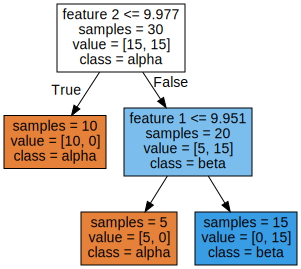

In [12]:
from IPython.core.display_functions import display
from sklearn.tree import export_graphviz

export_graphviz(
    decision_tree,
    out_file="tree.dot",
    class_names=["alpha", "beta"],
    feature_names=['feature 1', 'feature 2'],
    impurity=False,
    filled=True
)

import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))